## Introduction

#### create a model to classify the raisin based  7 morphological features are extracted from images.

### Import the necessary packages.

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # visualization
from matplotlib import pyplot as plt # visualization
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import re


from scipy.stats import skew, kurtosis
from prettytable import PrettyTable

### Import train and test dataset

In [2]:
train=pd.read_csv("../input/raisin/Training_DataSet_Raisin - Sheet1.csv")
test=pd.read_csv("../input/raisin/Testing_DataSet_Raisin - Sheet1.csv")

### Change column names in train and test dataset to lowercase.

In [3]:
train=train.rename(columns={col:col.lower()   for col in train.columns.values})
test=test.rename(columns={col:col.lower()  for col in test.columns.values})

### Structure of the train and test dataset.

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 495 entries, 0 to 494
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   key              495 non-null    int64  
 1   area             495 non-null    int64  
 2   majoraxislength  495 non-null    float64
 3   minoraxislength  495 non-null    float64
 4   eccentricity     495 non-null    float64
 5   convexarea       495 non-null    int64  
 6   extent           495 non-null    float64
 7   perimeter        495 non-null    float64
 8   class            495 non-null    object 
dtypes: float64(5), int64(3), object(1)
memory usage: 34.9+ KB


#### The above information shows that there are 495 data entries and 9 columns.

In [5]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405 entries, 0 to 404
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   key              405 non-null    int64  
 1   area             405 non-null    int64  
 2   majoraxislength  405 non-null    float64
 3   minoraxislength  405 non-null    float64
 4   eccentricity     405 non-null    float64
 5   convexarea       405 non-null    int64  
 6   extent           405 non-null    float64
 7   perimeter        405 non-null    float64
dtypes: float64(5), int64(3)
memory usage: 25.4 KB


#### The above information shows that there are 495 data entries and 9 columns.

### Let's see is there any missing values in train and test dataset by column wise.

In [6]:
train.isnull().sum()

key                0
area               0
majoraxislength    0
minoraxislength    0
eccentricity       0
convexarea         0
extent             0
perimeter          0
class              0
dtype: int64

#### The above information shows that there are no missing values.

In [7]:
test.isnull().sum()

key                0
area               0
majoraxislength    0
minoraxislength    0
eccentricity       0
convexarea         0
extent             0
perimeter          0
dtype: int64

#### The above information shows that there are no missing values.

### Let's see the glimpse of train dataset

In [8]:
train.head(2)

,key,area,majoraxislength,minoraxislength,eccentricity,convexarea,extent,perimeter,class
0,1,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,Keci
1,2,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,Keci


### Let's create a function to display the catgeorical column level counts.

In [9]:
def count_plot(df,col,rot=None,switchax=None,size=(8,6),title=''):
    _=plt.figure(figsize=size)
    if switchax:
        _=sns.countplot(y=df[col],order=df[col].value_counts().index);
        _=plt.title(title,fontsize=25)
        _=plt.ylabel(col,fontsize=20)
        _=plt.yticks(fontsize=14,rotation=rot)   

    else:
        _=sns.countplot(x=df[col],order=df[col].value_counts().index);
        _=plt.title(title,fontsize=25)
        _=plt.xlabel(col,fontsize=20)
        _=plt.xticks(fontsize=14,rotation=rot)   


### Let's see the target column distribution.

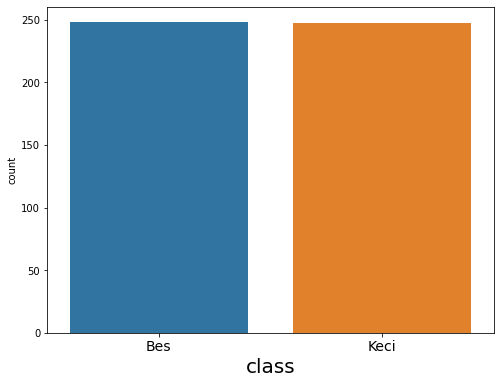

In [11]:
count_plot(train,'class')

In [12]:
train['class'].value_counts()

Bes     248
Keci    247
Name: class, dtype: int64

#### The above plot and summary explains that there is no class imbalance.

### Let's see the numerical columns distribution by using kernel density plot.

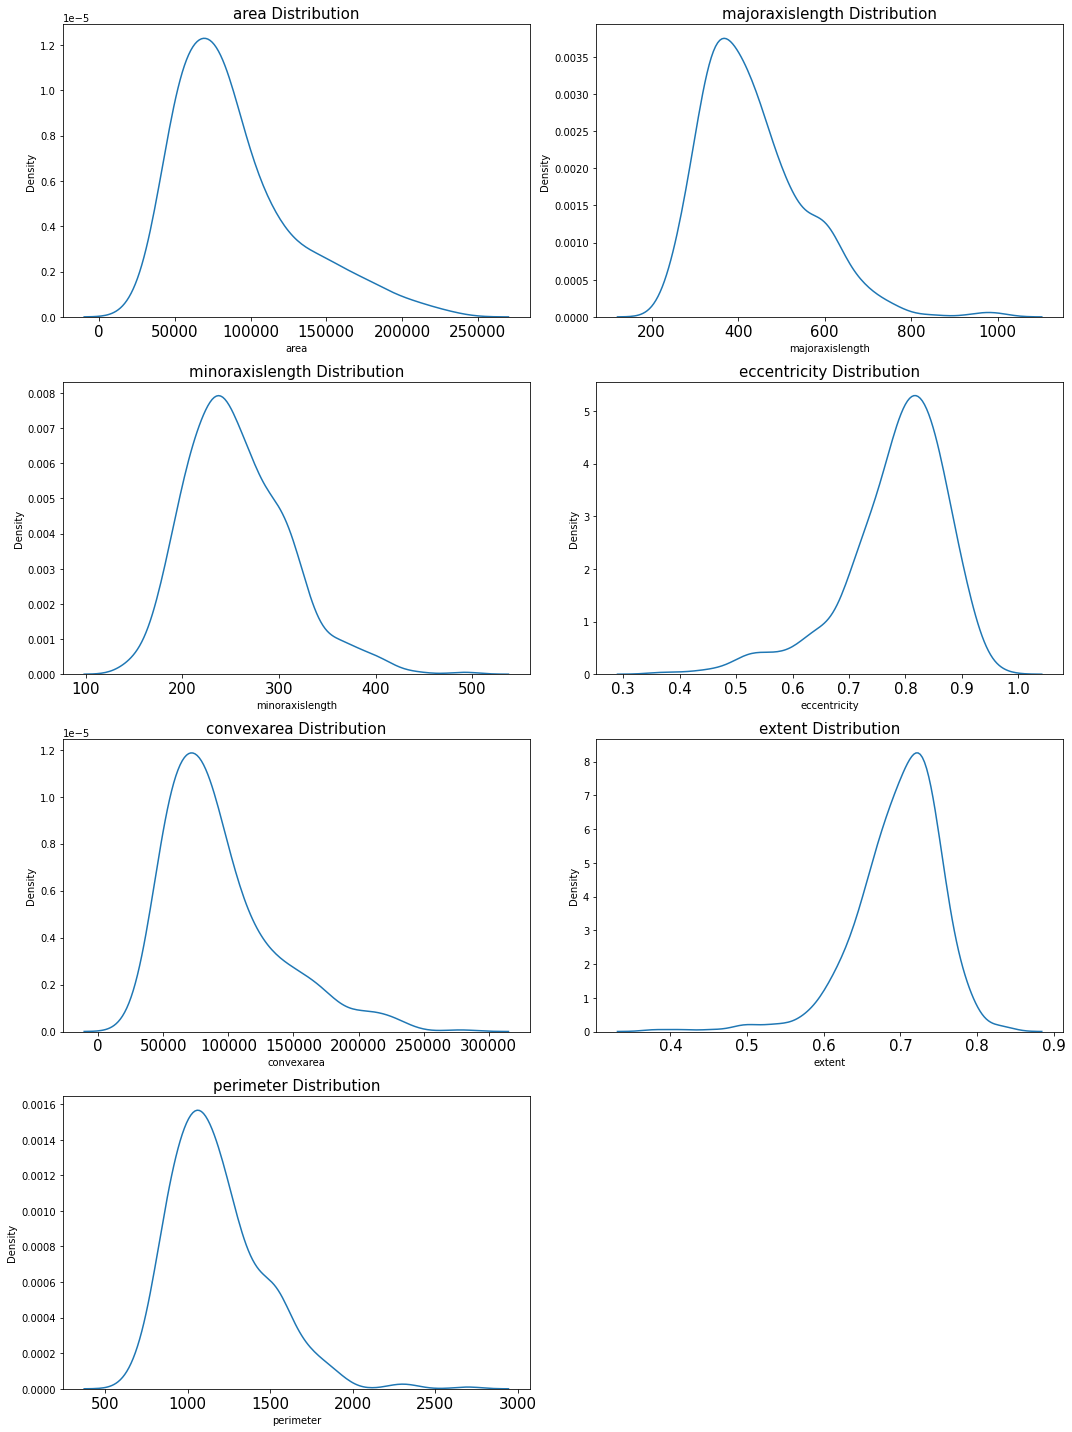

In [13]:
fig=plt.subplots(figsize=(15, 20))
for i,col  in enumerate(train.iloc[:,1:8].columns.values):    
       _=plt.subplot(4,2,i+1)
       _=sns.kdeplot(x=train[col])
       _=plt.title(col+' Distribution',fontsize=15)
       _=plt.xlabel(col,fontsize=10)
       _=plt.xticks(fontsize=15)
       _=plt.tight_layout()  
plt.show()  

### Let's see the numerical columns distribution by target class

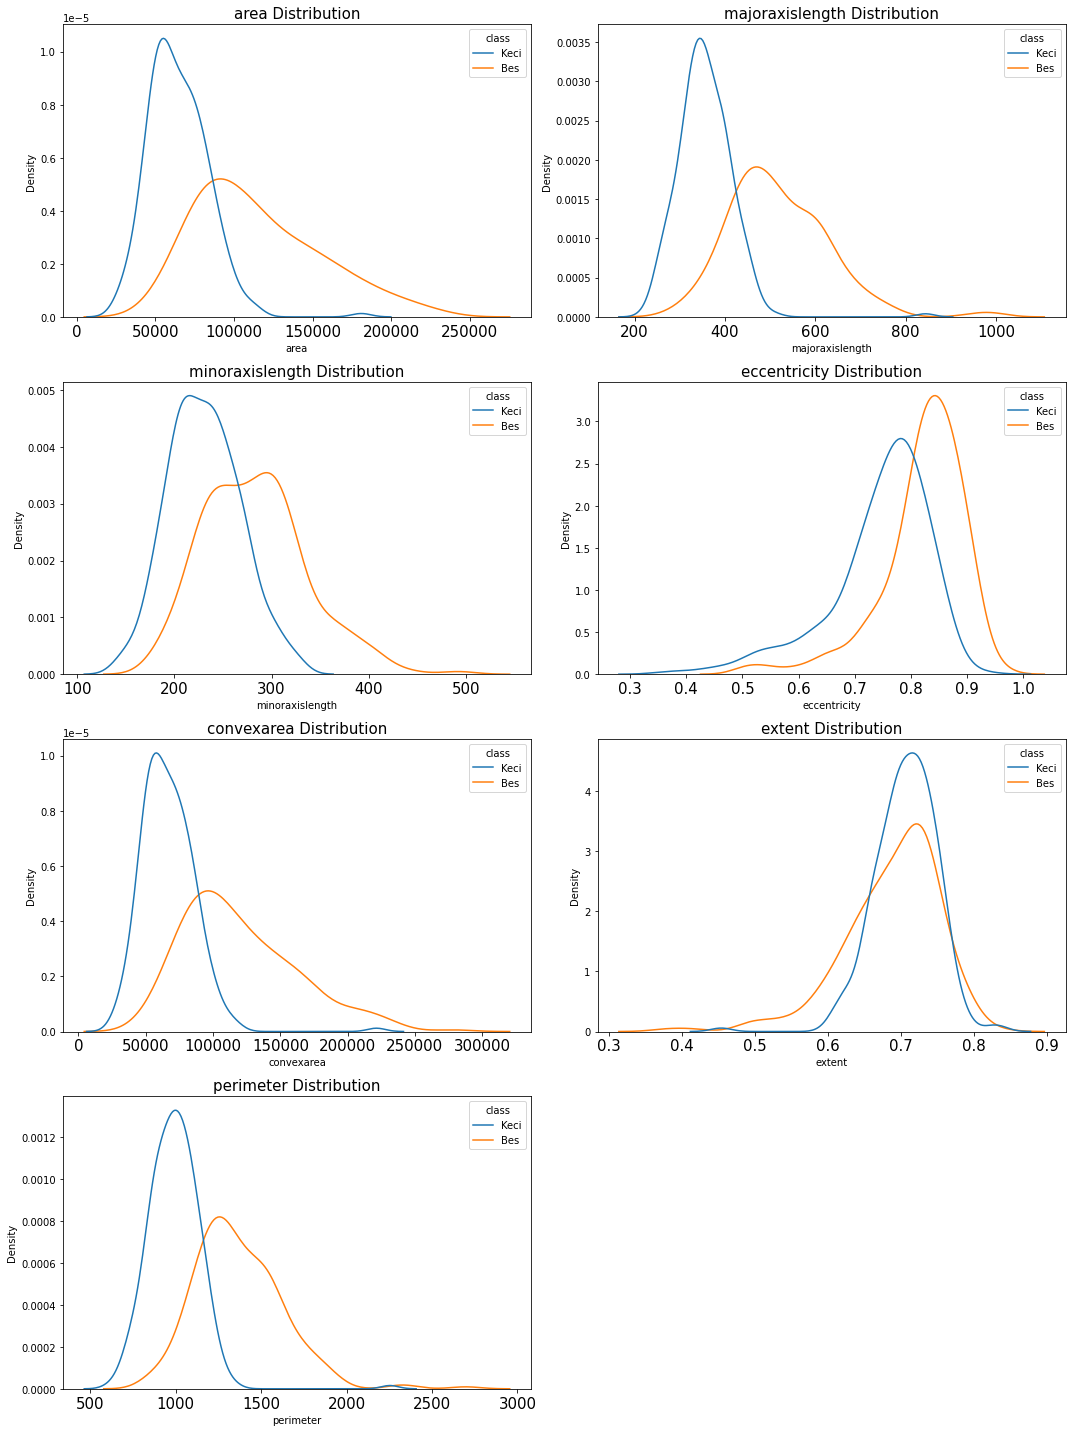

In [14]:
fig=plt.subplots(figsize=(15, 20))
for i,col  in enumerate(train.iloc[:,1:8].columns.values):    
       _=plt.subplot(4,2,i+1)
       _=sns.kdeplot(x=train[col],hue=train['class'])
       _=plt.title(col+' Distribution',fontsize=15)
       _=plt.xlabel(col,fontsize=10)
       _=plt.xticks(fontsize=15)
       _=plt.tight_layout()  
plt.show()  

In [15]:
kde_plot_summary = PrettyTable([i.capitalize() for i in['name','skew','kurtosis','mean','median','mean>median']])
kde_plot_summary.align['Name']="l"
for field in ['skew','kurtosis','mean','median']:
    kde_plot_summary.align[field]="r"
    


for num, col  in enumerate(train.iloc[:,1:8].columns.values):
    d=list()
    d.append(f"{num+1}.{col.capitalize()}")

    d.append(round(skew(train[col], axis=0, bias=True),3))
    d.append(round(kurtosis(train[col], axis=0, bias=True),3))
    d.append(round(train[col].describe()[1],3))
    d.append(round(train[col].describe()[6],3))
    d.append(train[col].describe()[1]>train[col].describe()[6])
    kde_plot_summary.add_row(d)

In [16]:
kde_plot_summary

Name,Skew,Kurtosis,Mean,Median,Mean>median
1.Area,1.129,0.887,89959.485,108237.5,False
2.Majoraxislength,1.093,1.791,437.102,507.262,False
3.Minoraxislength,0.748,0.894,256.935,290.376,False
4.Eccentricity,-1.259,2.09,0.783,0.847,False
5.Convexarea,1.232,1.402,93435.251,111957.5,False
6.Extent,-1.363,4.229,0.697,0.734,False
7.Perimeter,1.085,2.146,1181.181,1332.0,False


#### The above density plot and summary explains that all the numeric columns in the train dataset are normally distributed.

### Let's see the numerical columns distribution by using boxplot.

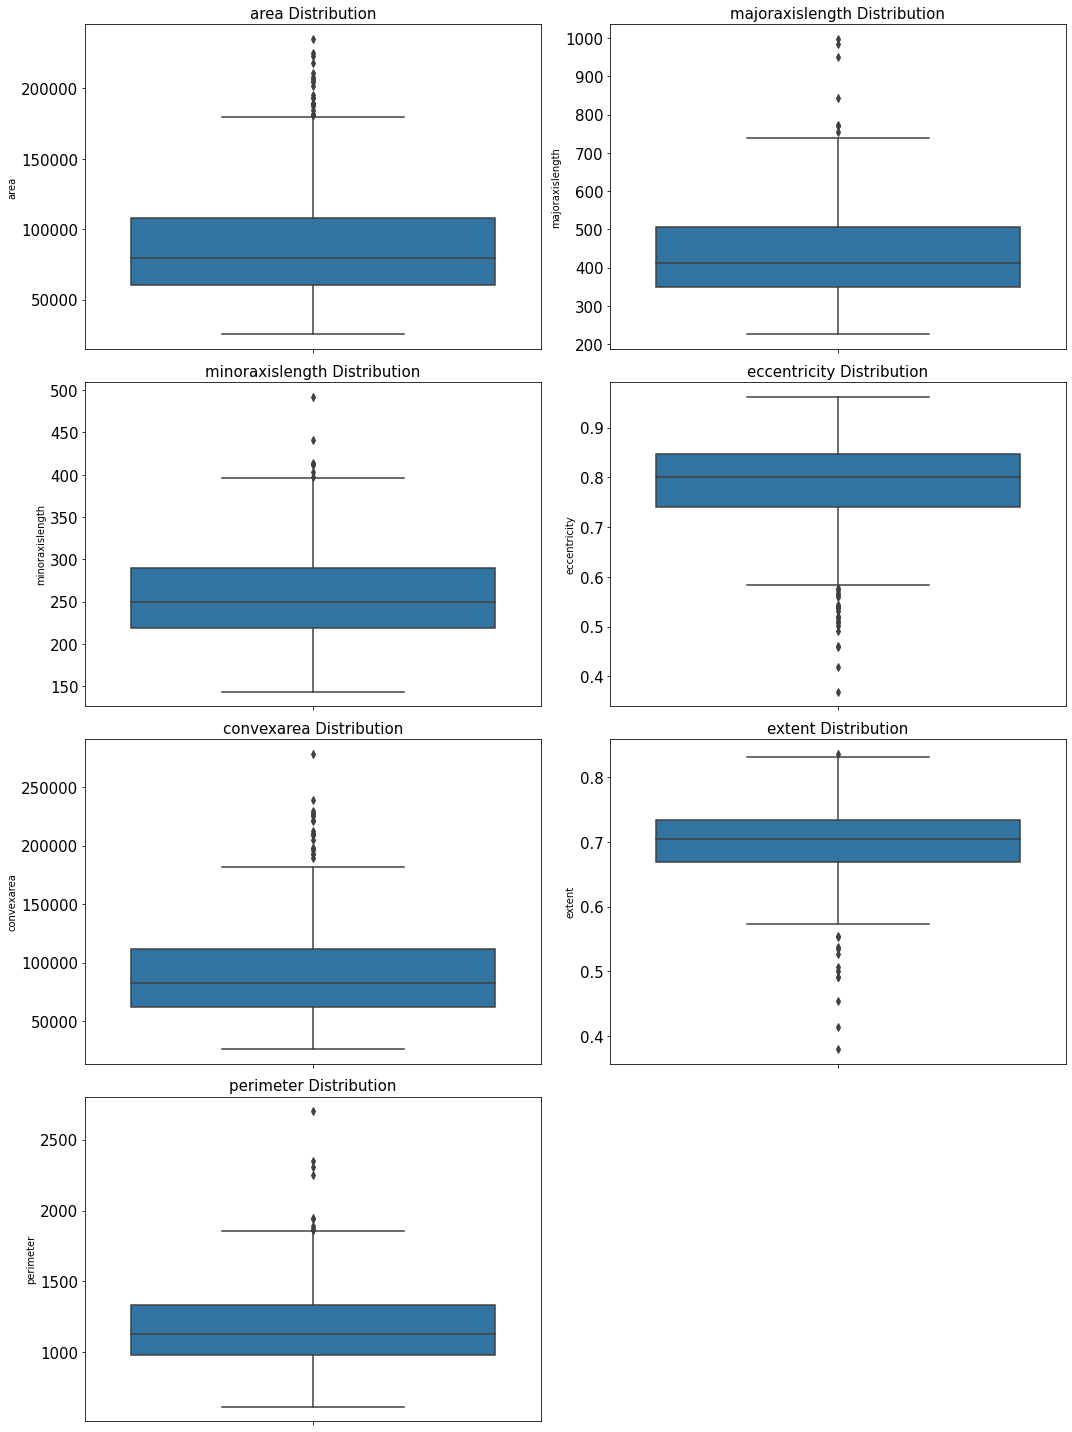

In [17]:
fig=plt.subplots(figsize=(15, 20))
for i,col  in enumerate(train.iloc[:,1:8].columns.values):    
       _=plt.subplot(4,2,i+1)
       _=sns.boxplot(y=train[col])
       _=plt.title(col+' Distribution',fontsize=15)
       _=plt.ylabel(col,fontsize=10)
       _=plt.yticks(fontsize=15)
       _=plt.tight_layout()  
plt.show()  

### Let's see the numerical columns distribution by target class

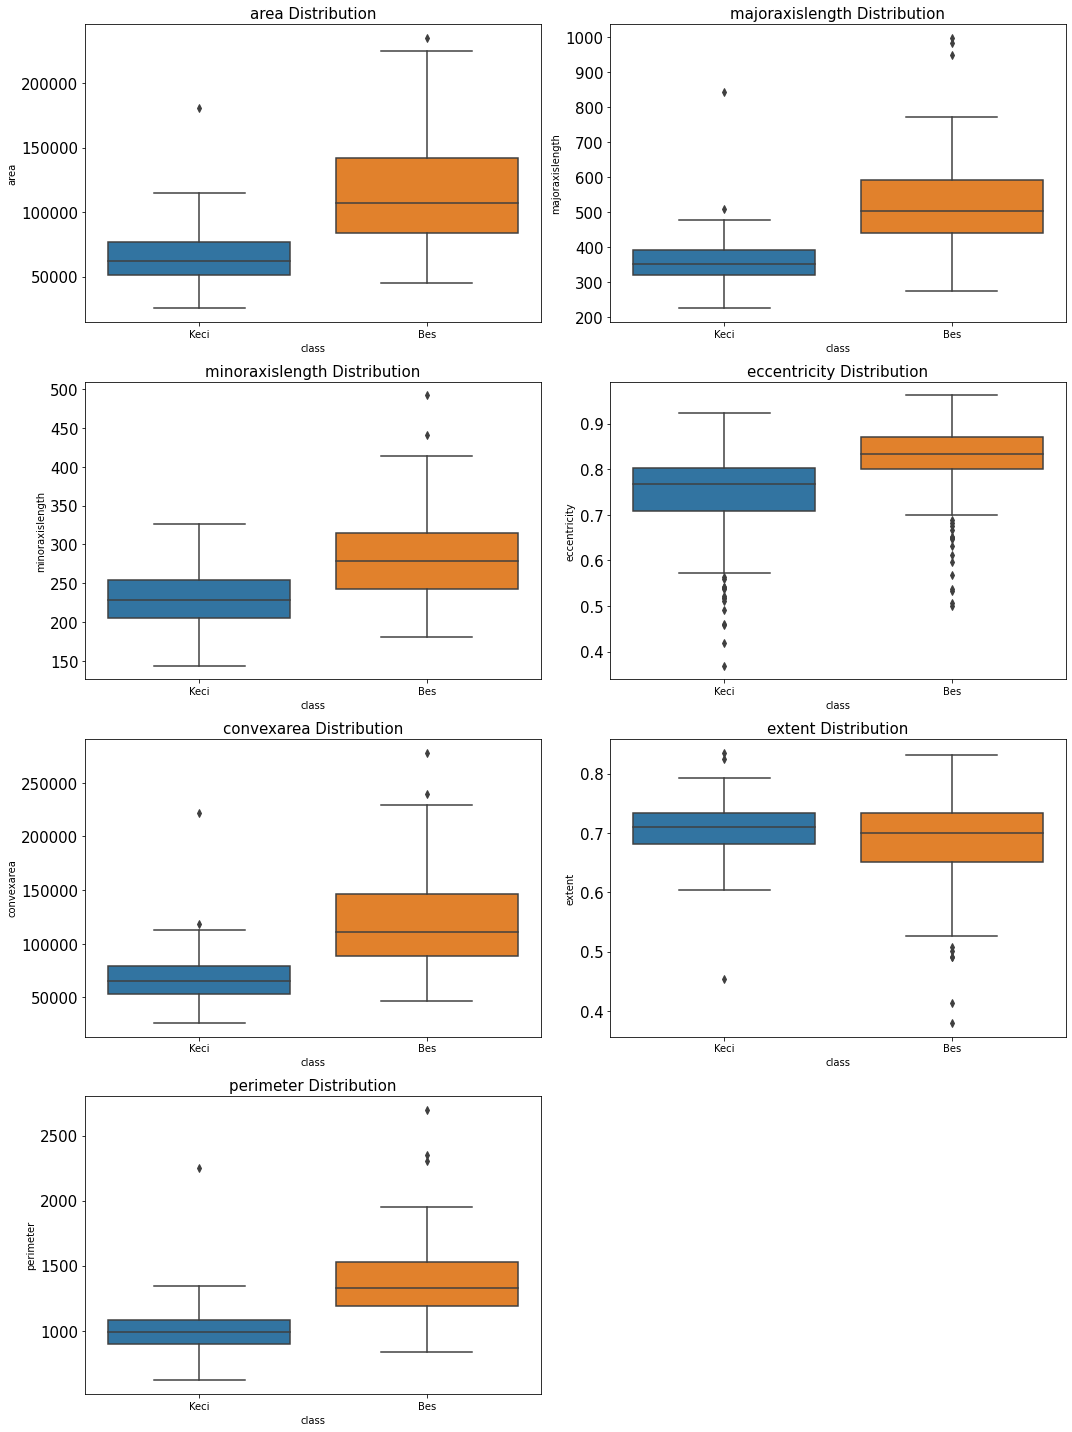

In [18]:
fig=plt.subplots(figsize=(15, 20))
for i,col  in enumerate(train.iloc[:,1:8].columns.values):    
       _=plt.subplot(4,2,i+1)
       _=sns.boxplot(x=train['class'],y=train[col])
       _=plt.title(col+' Distribution',fontsize=15)
       _=plt.ylabel(col,fontsize=10)
       _=plt.yticks(fontsize=15)
       _=plt.tight_layout()  
plt.show()  

In [19]:
box_plot_summary = PrettyTable([i.capitalize() for i in['name', 'min', 'Q1-25%', 'Q2(Median)50%', 'Q3-75%', 'max','iqr','lower limit','upper limit','outlier']])
box_plot_summary.align["Name"] = "l"

for num, col  in enumerate(train.iloc[:,1:8].columns.values):
    d=list()
    d.append(f"{num+1}.{col.capitalize()}")
    d.append(round(train[col].describe()[3],3))
    d.append(round(train[col].describe()[4],3))
    d.append(round(train[col].describe()[5],3))
    d.append(round(train[col].describe()[6],3))
    d.append(round(train[col].describe()[7],3))
    d.append(round(train[col].describe()[6]-train[col].describe()[4],3))
    low_limit=round(train[col].describe()[4]-1.5*(train[col].describe()[6]-train[col].describe()[4]),3)
    up_limit=round(train[col].describe()[6]+1.5*(train[col].describe()[6]-train[col].describe()[4]),3)
    d.append(low_limit)
    d.append(low_limit)
    d.append(any([(any(i < low_limit for i in train[col].values)), (any(i > up_limit for i in train[col].values))]))
    
    box_plot_summary.add_row(d)
  
    
  

In [20]:
box_plot_summary

Name,Min,Q1-25%,Q2(median)50%,Q3-75%,Max,Iqr,Lower limit,Upper limit,Outlier
1.Area,25387.0,60324.0,79735.0,108237.5,235047.0,47913.5,-11546.25,-11546.25,True
2.Majoraxislength,225.63,348.479,411.207,507.262,997.292,158.783,110.305,110.305,True
3.Minoraxislength,143.711,219.338,249.404,290.376,492.275,71.038,112.78,112.78,True
4.Eccentricity,0.369,0.74,0.801,0.847,0.962,0.106,0.581,0.581,True
5.Convexarea,26139.0,62438.0,82949.0,111957.5,278217.0,49519.5,-11841.25,-11841.25,True
6.Extent,0.38,0.669,0.705,0.734,0.835,0.065,0.571,0.571,True
7.Perimeter,619.074,979.288,1130.673,1332.0,2697.753,352.712,450.221,450.221,True


#### The above boxplot and summary explain that there are outliers(based on the turkey fences) in all numeric columns of the training dataset.

### Let's see the correlation between the numerical columns.

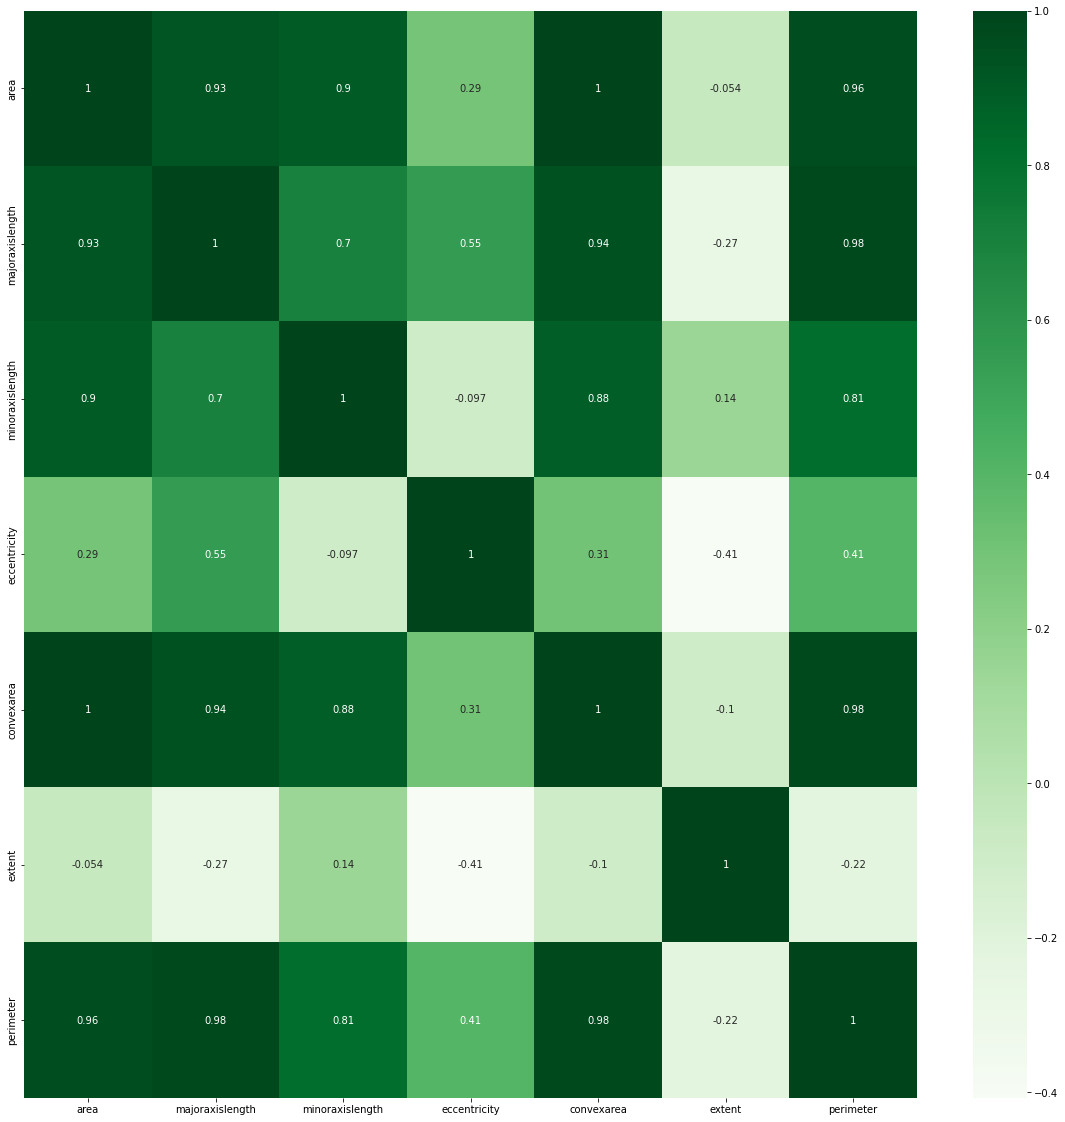

In [21]:
plt.figure(figsize=(20,20))
sns.heatmap(train.iloc[:,1:14].corr(),fmt='.2g',annot=True,cmap='Greens');

In [22]:
def corr_features(df,threshold,target):
    corr_list=df.corr().loc[target].drop(target)
    return corr_list[corr_list>threshold]
   

In [23]:
for num ,i in enumerate(train.iloc[:,np.r_[1:8]]):
  
    result=corr_features(train.iloc[:,np.r_[1:8]] ,0.7,i)
    if len(result) > 0:
        print("="*100)
        print(f"The {i} Column is Highly Correlated with Following Features \n")
        print(result)
        print("-"*100)
    else:
        pass

The area Column is Highly Correlated with Following Features 

majoraxislength    0.926188
minoraxislength    0.899689
convexarea         0.995359
perimeter          0.960990
Name: area, dtype: float64
----------------------------------------------------------------------------------------------------
The majoraxislength Column is Highly Correlated with Following Features 

area               0.926188
minoraxislength    0.703465
convexarea         0.941157
perimeter          0.977143
Name: majoraxislength, dtype: float64
----------------------------------------------------------------------------------------------------
The minoraxislength Column is Highly Correlated with Following Features 

area               0.899689
majoraxislength    0.703465
convexarea         0.884953
perimeter          0.813342
Name: minoraxislength, dtype: float64
----------------------------------------------------------------------------------------------------
The convexarea Column is Highly Correlated with

#### The above plot explains that there is a high positive correlation between the independent numeric columns.